In [2]:
#Exploratory Data Analysis
#Rent Prices GDL
#Roberto Ramirez

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("rental_data_formatted.csv")
df

,Unnamed: 0,location,price,bedrooms,bathrooms,garage,area
0,0,Nuevo México,10800,2,2.0,1.0,85.0
1,1,Puerta de Hierro,29800,2,2.0,2.0,110.0
2,2,Colinas de Atemajac,16000,2,2.0,2.0,70.0
3,3,Solares Residencial,29000,3,4.0,2.0,159.0
4,4,Jardines del Valle,14500,3,3.0,2.0,90.0
...,...,...,...,...,...,...,...
1053,1053,Puerta Plata,40000,2,NaN,NaN,NaN
1054,1054,Puerta de Hierro,35000,3,NaN,NaN,NaN
1055,1055,Puerta de Hierro,35000,2,NaN,NaN,NaN
1056,1056,Puerta de Hierro,32000,2,NaN,NaN,NaN


#### We're seeing a lot of NaN values and a few columns that could use formatting

In [4]:
#Drop the unnammed column 
df = df[['location','price','bedrooms','bathrooms','garage','area']]
df

,location,price,bedrooms,bathrooms,garage,area
0,Nuevo México,10800,2,2.0,1.0,85.0
1,Puerta de Hierro,29800,2,2.0,2.0,110.0
2,Colinas de Atemajac,16000,2,2.0,2.0,70.0
3,Solares Residencial,29000,3,4.0,2.0,159.0
4,Jardines del Valle,14500,3,3.0,2.0,90.0
...,...,...,...,...,...,...
1053,Puerta Plata,40000,2,NaN,NaN,NaN
1054,Puerta de Hierro,35000,3,NaN,NaN,NaN
1055,Puerta de Hierro,35000,2,NaN,NaN,NaN
1056,Puerta de Hierro,32000,2,NaN,NaN,NaN


#### We can assume these rental prices are subject mostly to a few variables, therefore we'd try to use linear regression to predict its values, so at the moment, we would work with numeric columns, excluding 'location'. 

In [5]:
df_numeric = df[['price','bedrooms','bathrooms','garage','area']]



#### We will also need to drop NaN values, for now, hoping the remaining data is still usable. 

In [6]:
df_numeric = df_numeric.dropna()

#Let's also turn those floats into nice ints. 
df_numeric = df_numeric.astype(int)
df_numeric

,price,bedrooms,bathrooms,garage,area
0,10800,2,2,1,85
1,29800,2,2,2,110
2,16000,2,2,2,70
3,29000,3,4,2,159
4,14500,3,3,2,90
...,...,...,...,...,...
370,40000,3,4,2,242
371,18800,3,3,2,175
372,28000,3,3,2,300
373,10000,2,2,2,155


In [7]:
# Let's get a description of data
df_numeric.describe()

,price,bedrooms,bathrooms,garage,area
count,3.750000e+02,375.000000,375.000000,375.000000,375.000000
mean,2.750099e+05,2.909333,2.584000,2.237333,221.992000
std,2.279010e+06,0.917619,0.971663,0.880382,274.192792
min,4.300000e+03,0.000000,1.000000,0.000000,16.000000
25%,1.400000e+04,2.000000,2.000000,2.000000,100.000000
50%,2.250000e+04,3.000000,2.000000,2.000000,135.000000
75%,3.410000e+04,3.000000,3.000000,2.000000,234.000000
max,3.341347e+07,6.000000,4.000000,4.000000,3000.000000


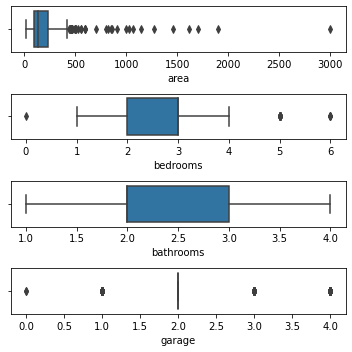

In [8]:
##Boxplots to identify outliers

fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(x=df_numeric['area'], ax = axs[0])
plt2 = sns.boxplot(x=df_numeric['bedrooms'], ax = axs[1])
plt3 = sns.boxplot(x=df_numeric['bathrooms'], ax = axs[2])
plt3 = sns.boxplot(x=df_numeric['garage'], ax = axs[3])
plt.tight_layout()

#### We have a lot of outliers. Let's get rid of them. 

In [9]:
#we're also dropping outliers
df_numeric = df_numeric[df_numeric['price'] < 90000]
df_numeric = df_numeric[df_numeric['area'] < 1000]

#And saving it to csv
df_numeric.to_csv("df_numeric.csv")

#### We managed to get from 1058 rows to just 375, so for now let's work with that! 

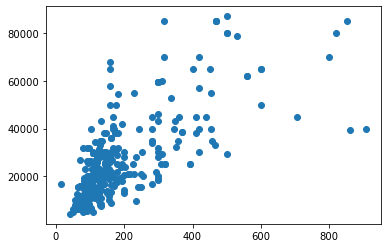

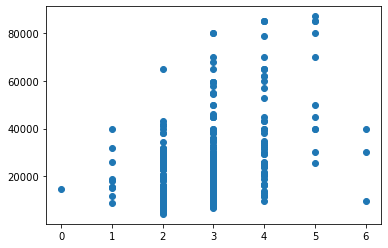

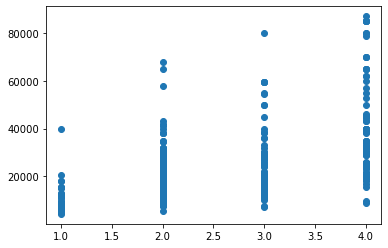

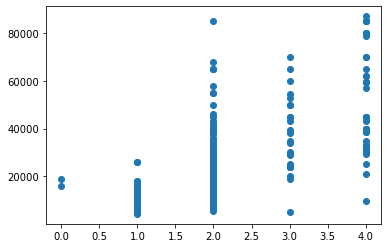

In [10]:
plt.scatter('area','price', data=df_numeric)
plt.ticklabel_format(style = 'plain')
plt.show()

plt.scatter('bedrooms','price', data=df_numeric)
plt.ticklabel_format(style = 'plain')
plt.show()

plt.scatter('bathrooms','price', data=df_numeric)
plt.ticklabel_format(style = 'plain')
plt.show()

plt.scatter('garage','price', data=df_numeric)
plt.ticklabel_format(style = 'plain')
plt.show()

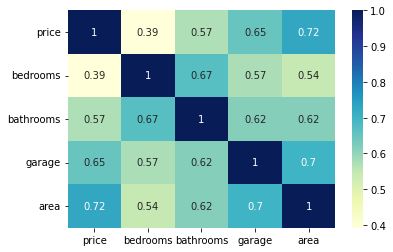

In [11]:
#Correlation map
sns.heatmap(df_numeric.corr(), cmap="YlGnBu", annot = True)
plt.show()